<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/NOV_24-25/RecogDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split


In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df


In [ ]:
# Seleccionar una fila
row = df.iloc[0]

# Extraer la etiqueta de la imagen
label = row['label']

# Extraer los valores de los píxeles y reformarlos en una matriz 2D
pixels = row.drop('label').values.reshape(28, 28)

# Visualizar la imagen
plt.title(f'Label: {label}')
plt.imshow(pixels, cmap='gray')
plt.show()


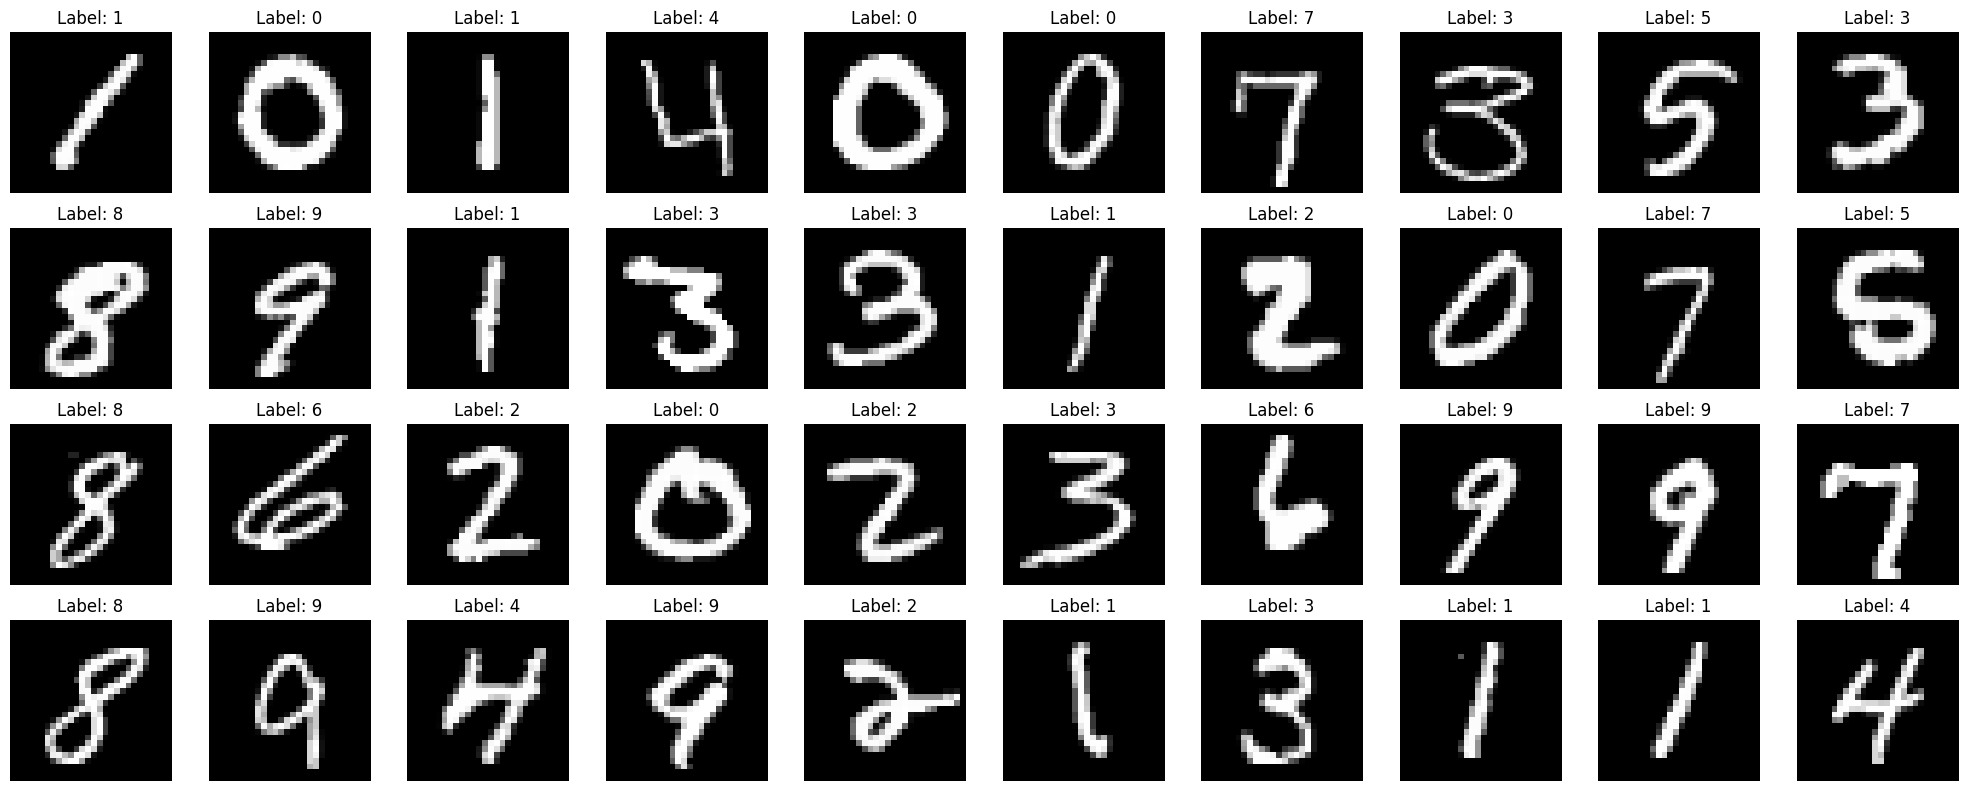

In [31]:

# Número de imágenes a visualizar
num_images = 40

# Número de filas y columnas
num_rows = 4
num_cols = 10

# Crear una figura para las imágenes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*2))

for i in range(num_images):
    # Seleccionar una fila
    row = df.iloc[i]

    # Extraer la etiqueta de la imagen
    label = row['label']

    # Extraer los valores de los píxeles y reformarlos en una matriz 2D
    pixels = row.drop('label').values.reshape(28, 28)

    # Visualizar la imagen
    axs[i//num_cols, i%num_cols].set_title(f'Label: {label}')
    axs[i//num_cols, i%num_cols].imshow(pixels, cmap='gray')
    axs[i//num_cols, i%num_cols].axis('off')

plt.tight_layout()
plt.show()



In [37]:
# Extraer etiquetas y valores de píxeles desde el nuevo conjunto de datos
etiquetas = df['label']
imagenes = df.drop(labels='label', axis=1)

# Manejar valores faltantes con imputación de la media
imagenes.fillna(imagenes.mean(), inplace=True)

# Normalizar valores de píxeles
imagenes = imagenes / 255.0

# Reorganizar los datos para que coincidan con la forma de entrada esperada para una CNN
imagenes = imagenes.values.reshape(-1, 28, 28, 1)

# Convertir etiquetas a vectores codificados en one-hot
num_etiquetas = etiquetas.nunique()
etiquetas = tf.keras.utils.to_categorical(etiquetas, num_etiquetas)

# Dividir los datos en conjuntos de entrenamiento y validación
imagenes_entrenamiento, imagenes_validacion, etiquetas_entrenamiento, etiquetas_validacion = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)


###### MODELO 1

https://stackoverflow.com/questions/57751417/what-is-meant-by-sequential-model-in-keras

POR LO QUE ENTENDI
Número de Filtros (5): Este valor determina cuántos filtros se aplicarán a la entrada en cada capa convolucional. Cada filtro es responsable de aprender diferentes patrones en los datos.

Tamaño del Kernel (3): El kernel es una pequeña ventana que se desplaza sobre la entrada. El valor 3 indica que se está utilizando un kernel de 3x3. En otras palabras, la convolución se realiza tomando parches de 3x3 de la entrada y aplicando la operación de convolución.

In [49]:
# Crear el modelo CNN
modelo = Sequential([
    Conv2D(5, 3, activation='relu', input_shape=(28, 28, 1)),
    Conv2D(5, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(5, 3, activation='relu'),
    Conv2D(5, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

modelo.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Ajustar el modelo utilizando aumento de datos y datos de validación
historia = modelo.fit(datagen.flow(imagenes_entrenamiento, etiquetas_entrenamiento, batch_size=32),
                      epochs=3,
                      validation_data=(imagenes_validacion, etiquetas_validacion))


Epoch 1/3
1050/1050 [==============================] - 52s 47ms/step - loss: 0.8893 - accuracy: 0.6981 - val_loss: 0.2199 - val_accuracy: 0.9337
Epoch 2/3
1050/1050 [==============================] - 44s 42ms/step - loss: 0.4265 - accuracy: 0.8662 - val_loss: 0.1518 - val_accuracy: 0.9548
Epoch 3/3
1050/1050 [==============================] - 47s 45ms/step - loss: 0.3329 - accuracy: 0.8992 - val_loss: 0.1255 - val_accuracy: 0.9620


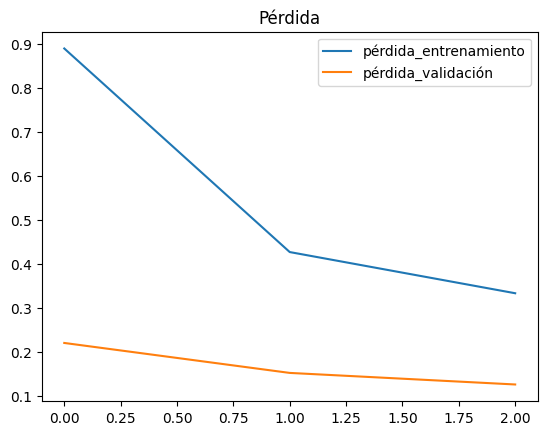

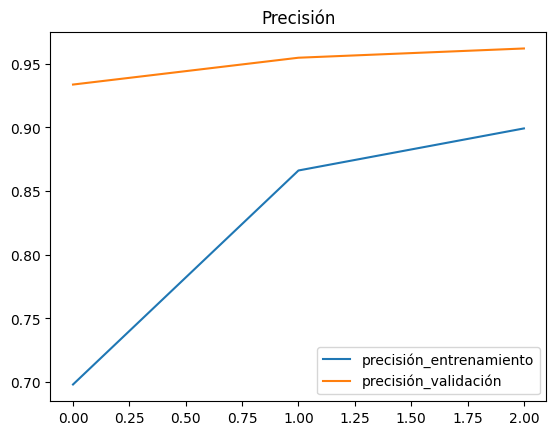

In [50]:
# Graficar las curvas de pérdida y precisión por separado
def graficar_curvas_de_pérdida(historia):
    """
    Devuelve curvas de pérdida separadas para métricas de entrenamiento y validación.
    """
    pérdida_entrenamiento = historia.history['loss']
    pérdida_validación = historia.history['val_loss']

    precisión_entrenamiento = historia.history['accuracy']
    precisión_validación = historia.history['val_accuracy']

    épocas = range(len(historia.history['loss']))

    # Graficar pérdida
    plt.plot(épocas, pérdida_entrenamiento, label='pérdida_entrenamiento')
    plt.plot(épocas, pérdida_validación, label='pérdida_validación')
    plt.title('Pérdida')
    plt.legend()

    # Graficar precisión
    plt.figure()
    plt.plot(épocas, precisión_entrenamiento, label='precisión_entrenamiento')
    plt.plot(épocas, precisión_validación, label='precisión_validación')
    plt.title('Precisión')
    plt.legend();
graficar_curvas_de_pérdida(historia)
plt.show()  # Esto asegura que se muestren las gráficas



In [43]:
# Cargar datos de prueba
test_data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Extraer etiquetas y valores de píxeles de los datos de prueba
# Asegúrate de realizar el mismo preprocesamiento que hiciste con los datos de entrenamiento
test_labels = test_data['label']
test_images = test_data.drop(labels='label', axis=1)
test_images.fillna(test_images.mean(), inplace=True)
test_images = test_images / 255.0
test_images = test_images.values.reshape(-1, 28, 28, 1)


In [44]:
# Realizar predicciones
y_probs = modelo.predict(test_images)

# Ver las primeras 3 predicciones
print(y_probs[:3])


1313/1313 [==============================] - 14s 10ms/step
[[9.7097909e-05 9.9768060e-01 3.4849077e-06 2.0370233e-08 1.1431708e-03
  2.8237582e-06 4.4025583e-05 9.4519992e-04 3.4104665e-05 4.9342863e-05]
 [9.9998051e-01 3.3326810e-11 6.8590663e-07 1.7656983e-07 5.7227577e-08
  3.3093269e-07 1.5177450e-05 6.5652934e-08 2.7993903e-07 2.7014537e-06]
 [3.0614974e-05 9.9965262e-01 4.6866603e-06 2.6383100e-07 8.2334249e-05
  1.2932499e-05 1.8196996e-06 1.7487987e-04 1.1873425e-05 2.7888387e-05]]


In [45]:
# Ver el número de clase predicho y la etiqueta para el primer ejemplo
índice_predicho = y_probs[0].argmax()
etiqueta_predicha = np.argmax(y_probs[0])

print(f"Número de Clase Predicho: {índice_predicho}")
print(f"Etiqueta Predicha: {etiqueta_predicha}")


Número de Clase Predicho: 1
Etiqueta Predicha: 1


In [46]:
# Convertir todas las predicciones de probabilidades a etiquetas
y_preds = y_probs.argmax(axis=1)

# Ver las primeras 10 etiquetas predichas
print(y_preds[:10])


[1 0 1 4 0 0 7 3 5 3]


1313/1313 [==============================] - 15s 11ms/step


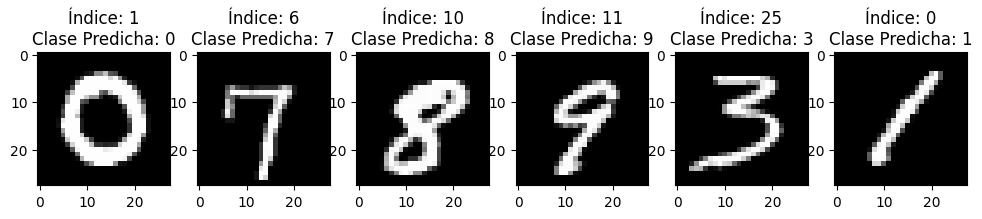

In [56]:
# Predecir en los datos de prueba
predicciones = modelo.predict(test_images)

# Obtener las clases predichas para varios índices
indices_a_visualizar = [1, 6, 10, 11, 25, 0]

# Mostrar las imágenes y las clases predichas para los índices seleccionados
plt.figure(figsize=(12, 6))

for i, índice in enumerate(indices_a_visualizar, 1):
    plt.subplot(1, len(indices_a_visualizar), i)

    # Obtener la clase predicha para la imagen en el índice actual
    predicción_actual = predicciones[índice]
    clase_predicha_actual = np.argmax(predicción_actual)

    # Mostrar la imagen
    plt.imshow(test_images[índice].reshape(28, 28), cmap='gray')
    plt.title(f"Índice: {índice}\nClase Predicha: {clase_predicha_actual}")
plt.show()



REPRESENTACION VISUAL DE LA ARQUITECTURA DEL MODELO USADO, ESPECIFICAMENTE DE LA FUNCION 'modelo'


https://stackoverflow.com/questions/71642212/how-to-plot-input-and-output-shapes-on-top-of-each-other-using-polt-model-in-ker

https://github.com/keras-team/tf-keras/issues/647

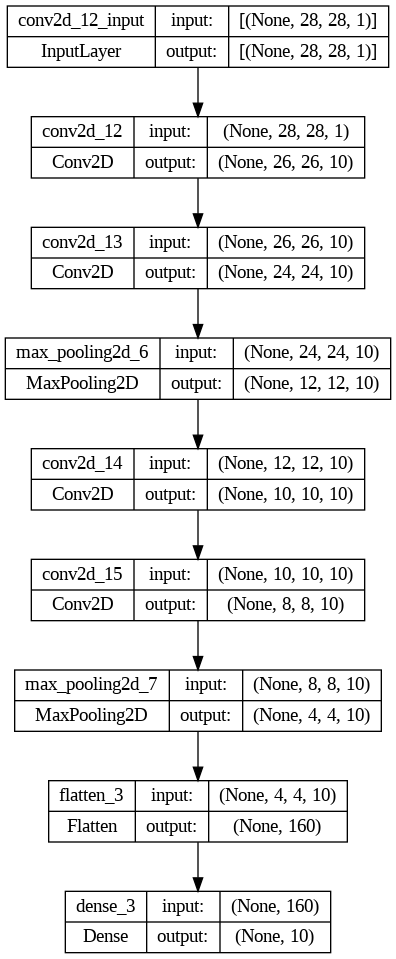

In [35]:
from tensorflow.keras.utils import plot_model

# Visualizar la arquitectura del modelo
plot_model(modelo, to_file='modelo.png', show_shapes=True, show_layer_names=True)

# Muestra la imagen generada
from IPython.display import Image
Image(filename='modelo.png')

###### MODELO 2

Epoch 1/5
1050/1050 [==============================] - 51s 44ms/step - loss: 0.5695 - accuracy: 0.8159 - val_loss: 0.1488 - val_accuracy: 0.9540
Epoch 2/5
1050/1050 [==============================] - 31s 30ms/step - loss: 0.2343 - accuracy: 0.9268 - val_loss: 0.1162 - val_accuracy: 0.9617
Epoch 3/5
1050/1050 [==============================] - 32s 30ms/step - loss: 0.1772 - accuracy: 0.9450 - val_loss: 0.0828 - val_accuracy: 0.9729
Epoch 4/5
1050/1050 [==============================] - 35s 33ms/step - loss: 0.1521 - accuracy: 0.9505 - val_loss: 0.0700 - val_accuracy: 0.9760
Epoch 5/5
1050/1050 [==============================] - 30s 28ms/step - loss: 0.1317 - accuracy: 0.9586 - val_loss: 0.0809 - val_accuracy: 0.9726


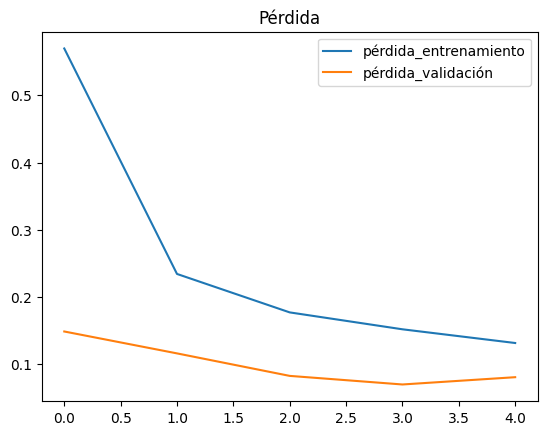

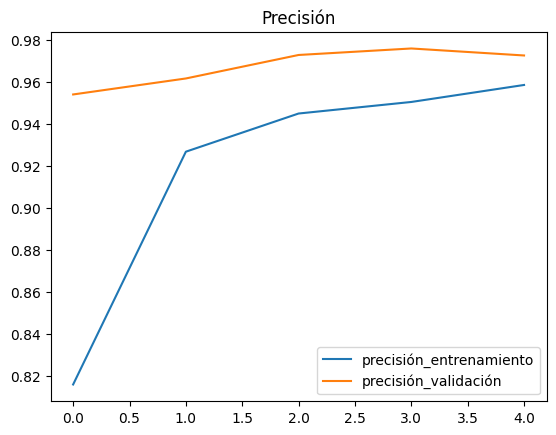

In [51]:
# Crear un nuevo modelo CNN
nuevo_modelo = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

nuevo_modelo.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Ajustar el nuevo modelo utilizando aumento de datos y datos de validación
historia_nuevo_modelo = nuevo_modelo.fit(datagen.flow(imagenes_entrenamiento, etiquetas_entrenamiento, batch_size=32),
                                         epochs=5,
                                         validation_data=(imagenes_validacion, etiquetas_validacion))

# Graficar las curvas de pérdida y precisión por separado para el nuevo modelo
def graficar_curvas_de_pérdida(historia):
    """
    Devuelve curvas de pérdida separadas para métricas de entrenamiento y validación.
    """
    pérdida_entrenamiento = historia.history['loss']
    pérdida_validación = historia.history['val_loss']

    precisión_entrenamiento = historia.history['accuracy']
    precisión_validación = historia.history['val_accuracy']

    épocas = range(len(historia.history['loss']))

    # Graficar pérdida
    plt.plot(épocas, pérdida_entrenamiento, label='pérdida_entrenamiento')
    plt.plot(épocas, pérdida_validación, label='pérdida_validación')
    plt.title('Pérdida')
    plt.legend()

    # Graficar precisión
    plt.figure()
    plt.plot(épocas, precisión_entrenamiento, label='precisión_entrenamiento')
    plt.plot(épocas, precisión_validación, label='precisión_validación')
    plt.title('Precisión')
    plt.legend();

# Graficar las curvas para el nuevo modelo
graficar_curvas_de_pérdida(historia_nuevo_modelo)
plt.show()  # Esto asegura que se muestren las gráficas


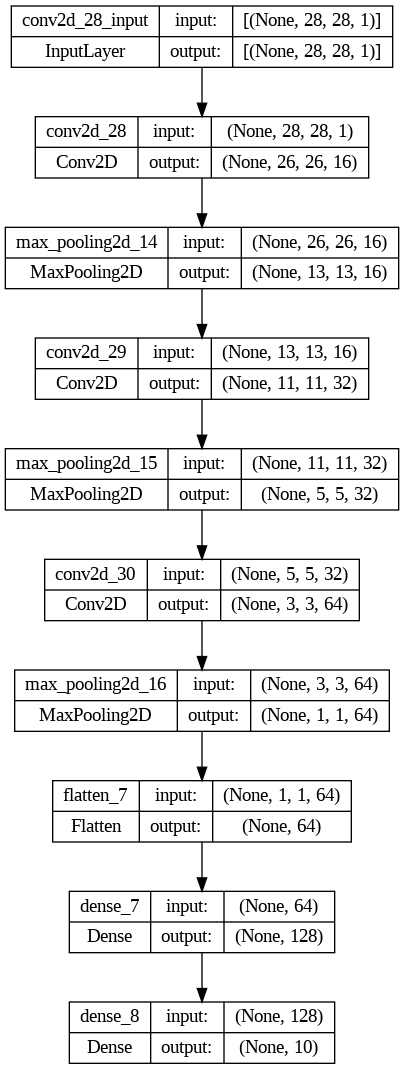

In [52]:

# Visualizar la arquitectura del modelo
plot_model(nuevo_modelo, to_file='modelo.png', show_shapes=True, show_layer_names=True)

# Muestra la imagen generada
from IPython.display import Image
Image(filename='modelo.png')

Este código utiliza subgráficos para mostrar las curvas de pérdida y precisión de ambos modelos en el mismo gráfico. Puedes observar las diferencias y similitudes entre las métricas de ambos modelos durante el entrenamiento

###### MODELO 3

Epoch 1/3
1050/1050 [==============================] - 23s 21ms/step - loss: 0.6972 - accuracy: 0.7929 - val_loss: 0.2445 - val_accuracy: 0.9351
Epoch 2/3
1050/1050 [==============================] - 19s 18ms/step - loss: 0.3051 - accuracy: 0.9114 - val_loss: 0.1612 - val_accuracy: 0.9525
Epoch 3/3
1050/1050 [==============================] - 18s 17ms/step - loss: 0.2366 - accuracy: 0.9304 - val_loss: 0.1419 - val_accuracy: 0.9567


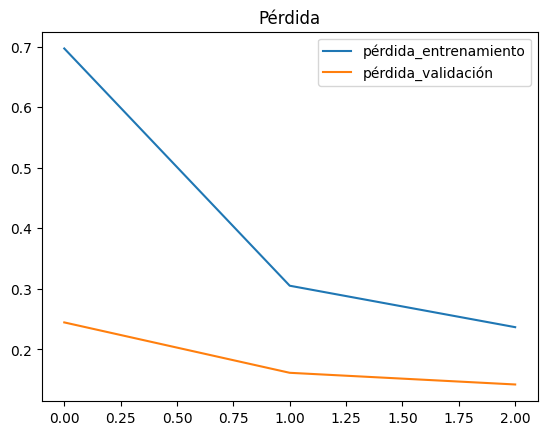

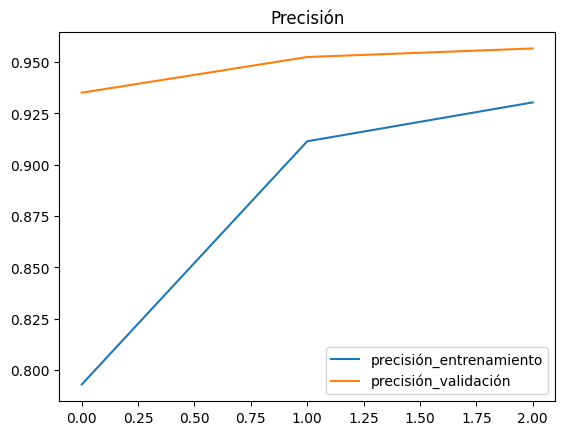

In [53]:
# Crear un modelo simple y básico
modelo_simple = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Aplanar la entrada para convertirla en un vector
    Dense(128, activation='relu'),     # Capa densa con 128 unidades y activación ReLU
    Dense(10, activation='softmax')     # Capa de salida con 10 unidades y activación softmax para clasificación
])

modelo_simple.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

#
historia_simple = modelo_simple.fit(datagen.flow(imagenes_entrenamiento, etiquetas_entrenamiento, batch_size=32),
                                   epochs=3,
                                   validation_data=(imagenes_validacion, etiquetas_validacion))


graficar_curvas_de_pérdida(historia_simple)
plt.show()

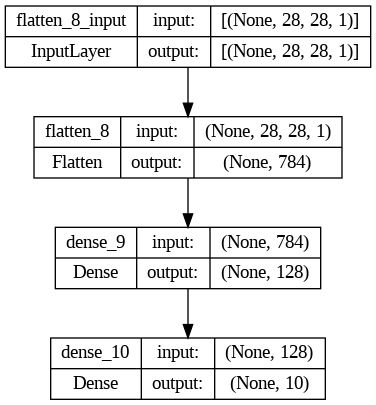

In [54]:
# Visualizar la arquitectura del modelo
plot_model(modelo_simple, to_file='modelo.png', show_shapes=True, show_layer_names=True)

# Muestra la imagen generada
from IPython.display import Image
Image(filename='modelo.png')

##Este código utiliza subgráficos para mostrar las curvas de pérdida y precisión de los tres modelos en el mismo gráfico. Con esto podemos ver y observar las diferencias y similitudes entre las métricas de los tres modelos durante el entrenamiento.

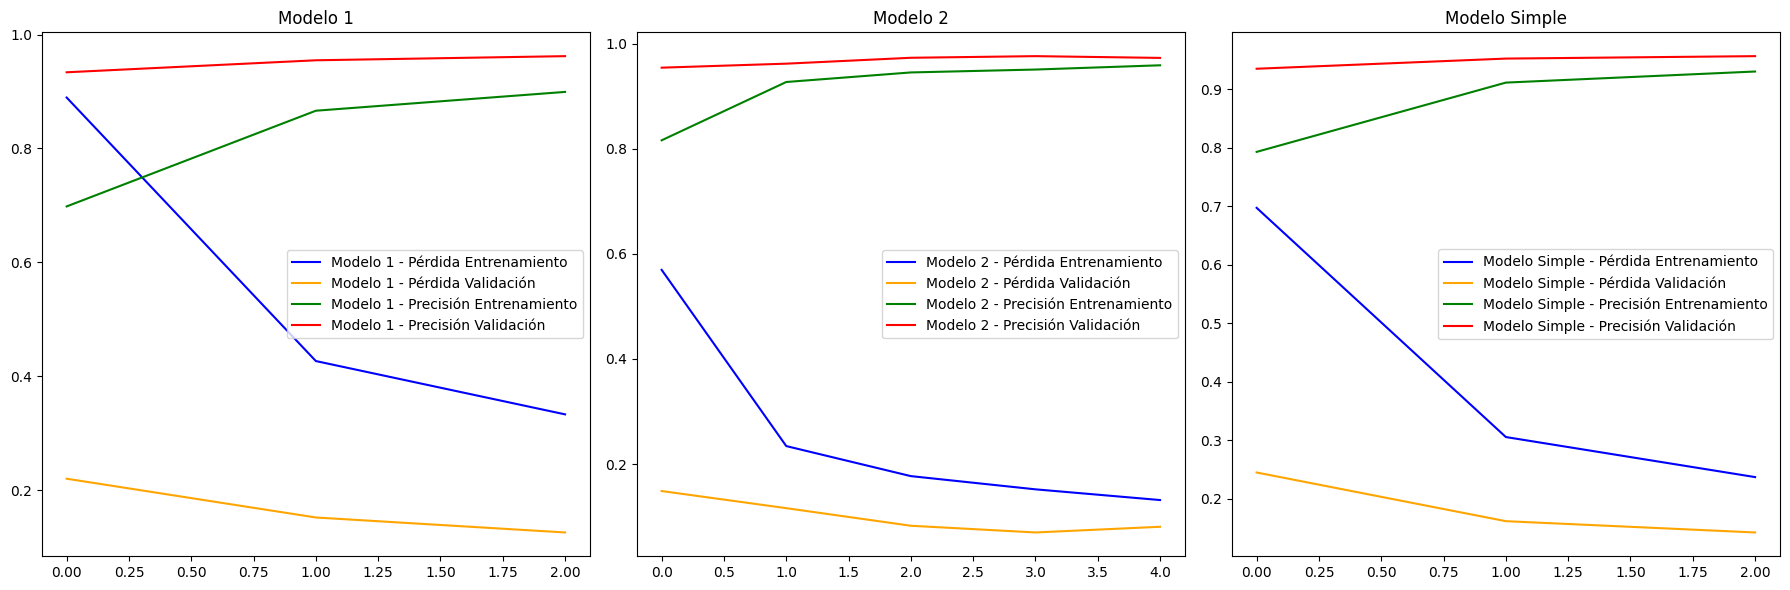

In [58]:
# Graficar las curvas de pérdida y precisión para los tres modelos
plt.figure(figsize=(18, 6))

# Modelo 1
plt.subplot(1, 3, 1)
plt.plot(historia.history['loss'], label='Modelo 1 - Pérdida Entrenamiento', color='blue')
plt.plot(historia.history['val_loss'], label='Modelo 1 - Pérdida Validación', color='orange')
plt.plot(historia.history['accuracy'], label='Modelo 1 - Precisión Entrenamiento', color='green')
plt.plot(historia.history['val_accuracy'], label='Modelo 1 - Precisión Validación', color='red')
plt.title('Modelo 1')
plt.legend()

# Modelo 2
plt.subplot(1, 3, 2)
plt.plot(historia_nuevo_modelo.history['loss'], label='Modelo 2 - Pérdida Entrenamiento', color='blue')
plt.plot(historia_nuevo_modelo.history['val_loss'], label='Modelo 2 - Pérdida Validación', color='orange')
plt.plot(historia_nuevo_modelo.history['accuracy'], label='Modelo 2 - Precisión Entrenamiento', color='green')
plt.plot(historia_nuevo_modelo.history['val_accuracy'], label='Modelo 2 - Precisión Validación', color='red')
plt.title('Modelo 2')
plt.legend()

# Modelo Simple
plt.subplot(1, 3, 3)
plt.plot(historia_simple.history['loss'], label='Modelo Simple - Pérdida Entrenamiento', color='blue')
plt.plot(historia_simple.history['val_loss'], label='Modelo Simple - Pérdida Validación', color='orange')
plt.plot(historia_simple.history['accuracy'], label='Modelo Simple - Precisión Entrenamiento', color='green')
plt.plot(historia_simple.history['val_accuracy'], label='Modelo Simple - Precisión Validación', color='red')
plt.title('Modelo Simple')
plt.legend()

plt.tight_layout()
plt.show()
